In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

# # Load the two datasets
# channels_df = pd.read_csv('dataset/channels.csv')
# videos_df = pd.read_csv('dataset/videos.csv')

# # Merge the two datasets based on the common field "Channel Title"
# merged_df = pd.merge(channels_df, videos_df, on='channel_title')



In [2]:
# merged_df.to_csv('Merged_Youtube_Dataset.csv', index=False)


In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('dataset/Merged_Youtube_Dataset.csv')

# Drop any rows with missing values
df.dropna(inplace=True)

# Remove any leading or trailing whitespace in all columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Convert categorical columns to numerical using one-hot encoding
#df = pd.get_dummies(df, columns=['category'])

# Normalize numerical columns to a range of 0-1
# df[numerical_cols] = (df[numerical_cols] - df[numerical_cols].min()) / (df[numerical_cols].max() - df[numerical_cols].min())

# # Save the preprocessed DataFrame to a new CSV file
# df.to_csv('preprocessed_data.csv', index=False)


In [4]:
import pandas as pd

# read the CSV file into a dataframe
df = pd.read_csv('dataset/Merged_Youtube_Dataset.csv')

# select the columns you want to drop
columns = ['Unnamed: 0_x', 'Unnamed: 0.1_x', 'channel_id','description_x','uploads','Unnamed0y','Unnamed0.1y','index','other_links','thumbnail','description_y','video_id']


# drop the selected columns from the dataframe
df = df.drop(columns=columns)

# save the new dataframe to a new CSV file
df.to_csv('new_ds.csv', index=False)



In [5]:
df = pd.read_csv('new_ds.csv')

In [8]:

df.head()

,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,duration,view_count_y,likes,comments,upload_time,topic_categories,Comments,SentimentTitle
0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",PT3M49S,1881,112,31,2022-06-25T12:31:21Z,"['https://en.wikipedia.org/wiki/Action_game', ...",[''],0
1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",PT4M8S,3206,172,38,2022-06-22T12:33:21Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['RIP eddie guerrero 1967-2005', 'I love this ...",1
2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",PT5M32S,536,28,38,2022-10-16T12:27:44Z,"['https://en.wikipedia.org/wiki/Action_game', ...",['Finally you are back kaha the itne din se b...,1
3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",PT3M55S,2744,145,28,2022-06-16T12:26:15Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['I miss ultimate warrior rip ', 'I ultimate ...",1
4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",PT2M31S,212,13,14,2023-03-05T08:28:32Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['We miss your wwe undefeated videos', 'Hey on...",0


In [9]:
def convert_duration(duration):
    # remove 'PT' and 'S' from the duration string
    duration = duration.strip('PT').strip('S')
    
    # check if duration contains 'M' character
    if 'M' in duration:
        # split the duration into minutes and seconds
        minutes, seconds = duration.split('M')
        # convert minutes and seconds to integers
        minutes = int(minutes) if minutes.isdigit() else 0
        seconds = int(seconds) if seconds.isdigit() else 0
    else:
        # set minutes to 0 and convert seconds to integer
        minutes = 0
        seconds = int(duration) if duration.isdigit() else 0
        
    minutes = minutes *60 
    seconds = minutes+seconds 
    return seconds 


In [10]:
# df['engagement_rate'] = (df['view_count_y'] + df[''] + df['comments'] + df['shares']) / df['subs']
# df['engagement_rate'].head

In [11]:
df["duration_re"] = df["duration"].apply(convert_duration)
df = df.drop("duration",axis = 1)
df.head()

,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,view_count_y,likes,comments,upload_time,topic_categories,Comments,SentimentTitle,duration_re
0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",1881,112,31,2022-06-25T12:31:21Z,"['https://en.wikipedia.org/wiki/Action_game', ...",[''],0,229
1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",3206,172,38,2022-06-22T12:33:21Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['RIP eddie guerrero 1967-2005', 'I love this ...",1,248
2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",536,28,38,2022-10-16T12:27:44Z,"['https://en.wikipedia.org/wiki/Action_game', ...",['Finally you are back kaha the itne din se b...,1,332
3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",2744,145,28,2022-06-16T12:26:15Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['I miss ultimate warrior rip ', 'I ultimate ...",1,235
4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",212,13,14,2023-03-05T08:28:32Z,"['https://en.wikipedia.org/wiki/Action_game', ...","['We miss your wwe undefeated videos', 'Hey on...",0,151


In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment(comments):
    # Initialize the sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    
    # Initialize the sentiment counts
    pos_count = 0
    neg_count = 0
    neu_count = 0

    # Loop through each comment and compute its sentiment score
    for comment_str in comments:
        # Split the comma separated strings into individual strings
        comment_list = comment_str.split(',')
        
        for comment in comment_list:
            # Compute the sentiment score of the comment
            scores = analyzer.polarity_scores(comment)
            sentiment_score = scores["compound"]
        
            # Classify the comment as positive, negative, or neutral based on the sentiment score
            if sentiment_score > 0.05:
                #print(f"{comment} --> Positive sentiment")
                pos_count += 1
            elif sentiment_score < -0.05:
                #print(f"{comment} --> Negative sentiment")
                neg_count += 1
            else:
                #print(f"{comment} --> Neutral sentiment")
                neu_count += 1

    # Return the maximum count among positive, negative, and neutral sentiments
    mean = np.mean([pos_count, neg_count, neu_count])
    return mean 


In [13]:
df['Sen_Com'] = df["Comments"].apply(get_sentiment)




In [14]:
df['Sen_Com']/1000

df.to_csv("new_ds.csv")

In [15]:
 df.columns


Index(['channel_title', 'view_count_x', 'subscriber_count', 'video_count',
       'created_time', 'category_id', 'tags', 'view_count_y', 'likes',
       'comments', 'upload_time', 'topic_categories', 'Comments',
       'SentimentTitle', 'duration_re', 'Sen_Com'],
      dtype='object')

In [16]:
import pandas as pd
import re

filename = "new_ds.csv"
column_name = "topic_categories"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Remove URLs ending with "wiki/" from the specified column using regular expressions
df[column_name] = df[column_name].apply(lambda x: re.sub(r'http\S+wiki/', '', str(x)))

# Print the updated column
print(df[column_name].head(10))

0    ['Action_game', 'Sports_game', 'Video_game_cul...
1    ['Action_game', 'Sports_game', 'Video_game_cul...
2                ['Action_game', 'Video_game_culture']
3    ['Action_game', 'Sports_game', 'Video_game_cul...
4    ['Action_game', 'Role-playing_video_game', 'Vi...
5                ['Sports_game', 'Video_game_culture']
6                            ['Lifestyle_(sociology)']
7                ['Sports_game', 'Video_game_culture']
8    ['Action_game', 'Role-playing_video_game', 'Vi...
9    ['Action_game', 'Sports_game', 'Video_game_cul...
Name: topic_categories, dtype: object


In [17]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("new_ds.csv")

# Split the strings in the column into lists
df["topic_categories"] = df["topic_categories"].str.split(",")

# Get all unique strings in the column
unique_strings = pd.Series(df["topic_categories"].sum()).unique()

# Assign a unique value to each unique string using factorize()
string_to_value = pd.Series(pd.factorize(unique_strings)[0], index=unique_strings).to_dict()

# Map each string in the column to its assigned value
df["topic_categories"] = df["topic_categories"].apply(lambda x: [string_to_value[i] for i in x])

# Print the updated column
print(df["topic_categories"].head(10))
df.to_csv("new_ds.csv")

0    [0, 1, 2]
1    [0, 1, 2]
2       [0, 2]
3    [0, 1, 2]
4    [0, 3, 2]
5       [4, 2]
6          [5]
7       [4, 2]
8    [0, 3, 2]
9    [0, 1, 2]
Name: topic_categories, dtype: object


In [18]:
df.head()

,Unnamed: 0,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,view_count_y,likes,comments,upload_time,topic_categories,Comments,SentimentTitle,duration_re,Sen_Com
0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",1881,112,31,2022-06-25T12:31:21Z,"[0, 1, 2]",[''],0,229,1.333333
1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",3206,172,38,2022-06-22T12:33:21Z,"[0, 1, 2]","['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667
2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",536,28,38,2022-10-16T12:27:44Z,"[0, 2]",['Finally you are back kaha the itne din se b...,1,332,803.666667
3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",2744,145,28,2022-06-16T12:26:15Z,"[0, 1, 2]","['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667
4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",212,13,14,2023-03-05T08:28:32Z,"[0, 3, 2]","['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333


In [19]:
df["upload_time_copy"] = df["upload_time"]
df["upload_time_copy1"] = df["upload_time"]
df["upload_time_copy2"] = df["upload_time"]
df.to_csv('new_ds.csv', index=False)

In [20]:
print(df.columns)

Index(['Unnamed: 0', 'channel_title', 'view_count_x', 'subscriber_count',
       'video_count', 'created_time', 'category_id', 'tags', 'view_count_y',
       'likes', 'comments', 'upload_time', 'topic_categories', 'Comments',
       'SentimentTitle', 'duration_re', 'Sen_Com', 'upload_time_copy',
       'upload_time_copy1', 'upload_time_copy2'],
      dtype='object')


In [21]:
import pandas as pd

filename = "new_ds.csv"
column_name = "upload_time_copy2"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Remove everything before "T" in the timestamp
df[column_name] = df[column_name].apply(lambda x: str(x)[11:13])

# Print the updated column
print(df[column_name].head(10))

0    12
1    12
2    12
3    12
4    08
5    09
6    06
7    12
8    12
9    14
Name: upload_time_copy2, dtype: object


In [22]:
df["upload_moment"] = df[column_name].astype(int)
df["upload_moment"] = np.array(df["upload_moment"])
df.head()

,Unnamed: 0,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,view_count_y,likes,...,upload_time,topic_categories,Comments,SentimentTitle,duration_re,Sen_Com,upload_time_copy,upload_time_copy1,upload_time_copy2,upload_moment
0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",1881,112,...,2022-06-25T12:31:21Z,"[0, 1, 2]",[''],0,229,1.333333,2022-06-25T12:31:21Z,2022-06-25T12:31:21Z,12,12
1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",3206,172,...,2022-06-22T12:33:21Z,"[0, 1, 2]","['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667,2022-06-22T12:33:21Z,2022-06-22T12:33:21Z,12,12
2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",536,28,...,2022-10-16T12:27:44Z,"[0, 2]",['Finally you are back kaha the itne din se b...,1,332,803.666667,2022-10-16T12:27:44Z,2022-10-16T12:27:44Z,12,12
3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",2744,145,...,2022-06-16T12:26:15Z,"[0, 1, 2]","['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667,2022-06-16T12:26:15Z,2022-06-16T12:26:15Z,12,12
4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",212,13,...,2023-03-05T08:28:32Z,"[0, 3, 2]","['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333,2023-03-05T08:28:32Z,2023-03-05T08:28:32Z,08,8


In [23]:
df.to_csv("new_ds.csv") 

In [24]:
import pandas as pd

filename = "new_ds.csv"
column_name = "upload_time_copy"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Remove everything before "T" in the timestamp
df[column_name] = df[column_name].apply(lambda x: str(x)[8:10])

# Print the updated column
print(df[column_name].head(10))

0    25
1    22
2    16
3    16
4    05
5    06
6    12
7    05
8    12
9    13
Name: upload_time_copy, dtype: object


In [25]:
df["upload_day"] = df["upload_time_copy"].astype(int)


In [26]:
df["upload_day"] = np.array(df["upload_day"])

In [27]:
type(df["upload_day"])
df.head()

,Unnamed: 0,Unnamed: 0.1,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,view_count_y,...,topic_categories,Comments,SentimentTitle,duration_re,Sen_Com,upload_time_copy,upload_time_copy1,upload_time_copy2,upload_moment,upload_day
0,0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",1881,...,"[0, 1, 2]",[''],0,229,1.333333,25,2022-06-25T12:31:21Z,12,12,25
1,1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",3206,...,"[0, 1, 2]","['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667,22,2022-06-22T12:33:21Z,12,12,22
2,2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",536,...,"[0, 2]",['Finally you are back kaha the itne din se b...,1,332,803.666667,16,2022-10-16T12:27:44Z,12,12,16
3,3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",2744,...,"[0, 1, 2]","['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667,16,2022-06-16T12:26:15Z,12,12,16
4,4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",212,...,"[0, 3, 2]","['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333,05,2023-03-05T08:28:32Z,8,8,5


In [28]:
df.to_csv("new_ds.csv")

In [29]:
import pandas as pd

filename = "new_ds.csv"
column_name = "upload_time_copy1"

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(filename)

# Remove everything before "T" in the timestamp
df[column_name] = df[column_name].apply(lambda x: str(x)[5:7])

# Print the updated column
print(df[column_name].head(10))

0    06
1    06
2    10
3    06
4    03
5    06
6    03
7    06
8    03
9    06
Name: upload_time_copy1, dtype: object


In [30]:
df["upload_month"] = df["upload_time_copy1"].astype(int)

In [31]:
df["upload_month"] = np.array(df["upload_month"])

In [32]:
df["upload_month"]

0       6
1       6
2      10
3       6
4       3
       ..
466     3
467     3
468     2
469     3
470     3
Name: upload_month, Length: 471, dtype: int32

In [33]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,...,Comments,SentimentTitle,duration_re,Sen_Com,upload_time_copy,upload_time_copy1,upload_time_copy2,upload_moment,upload_day,upload_month
0,0,0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,[''],0,229,1.333333,25,06,12,12,25,6
1,1,1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,"['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667,22,06,12,12,22,6
2,2,2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,['Finally you are back kaha the itne din se b...,1,332,803.666667,16,10,12,12,16,10
3,3,3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,"['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667,16,06,12,12,16,6
4,4,4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,"['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333,5,03,8,8,5,3


In [34]:
df.to_csv("new_ds.csv")

In [35]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,...,Comments,SentimentTitle,duration_re,Sen_Com,upload_time_copy,upload_time_copy1,upload_time_copy2,upload_moment,upload_day,upload_month
0,0,0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,[''],0,229,1.333333,25,06,12,12,25,6
1,1,1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,"['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667,22,06,12,12,22,6
2,2,2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,['Finally you are back kaha the itne din se b...,1,332,803.666667,16,10,12,12,16,10
3,3,3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,"['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667,16,06,12,12,16,6
4,4,4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,"['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333,5,03,8,8,5,3


In [36]:
columns = ['upload_time_copy','upload_time_copy1','upload_time_copy2']
df = df.drop(columns = columns)

In [37]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,channel_title,view_count_x,subscriber_count,video_count,created_time,category_id,tags,...,comments,upload_time,topic_categories,Comments,SentimentTitle,duration_re,Sen_Com,upload_moment,upload_day,upload_month
0,0,0,0,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,31,2022-06-25T12:31:21Z,"[0, 1, 2]",[''],0,229,1.333333,12,25,6
1,1,1,1,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,38,2022-06-22T12:33:21Z,"[0, 1, 2]","['RIP eddie guerrero 1967-2005', 'I love this ...",1,248,598.666667,12,22,6
2,2,2,2,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,38,2022-10-16T12:27:44Z,"[0, 2]",['Finally you are back kaha the itne din se b...,1,332,803.666667,12,16,10
3,3,3,3,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['wwe undefeated', 'wwe undefeated gameplay', ...",...,28,2022-06-16T12:26:15Z,"[0, 1, 2]","['I miss ultimate warrior rip ', 'I ultimate ...",1,235,492.666667,12,16,6
4,4,4,4,Onkiify,1443714,4820,193,2017-05-18T17:27:05Z,20,"['valorant', 'valorant riot games', 'valorant ...",...,14,2023-03-05T08:28:32Z,"[0, 3, 2]","['We miss your wwe undefeated videos', 'Hey on...",0,151,348.333333,8,5,3


In [38]:
df["engagement_score"] = (df["likes"]+df["comments"]+df["duration_re"])/df["view_count_x"]
df["engagement_score"]= df["engagement_score"]*1000
df["engagement_score"] = df["engagement_score"].round(4)

In [39]:
df["Sen_Com"] = df["Sen_Com"]/1000

In [40]:
df["Sen_Com"] = np.array(df["Sen_Com"]).round(4)


In [41]:
df["Sen_Com"]
df.to_csv("new_ds.csv")


In [42]:
df["view_count_x"] = (df["view_count_x"]/10000).round(4)
df["subscriber_count"] = (df["subscriber_count"]/1000).round(4)
df.to_csv("new_ds.csv")

# Model Training 

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

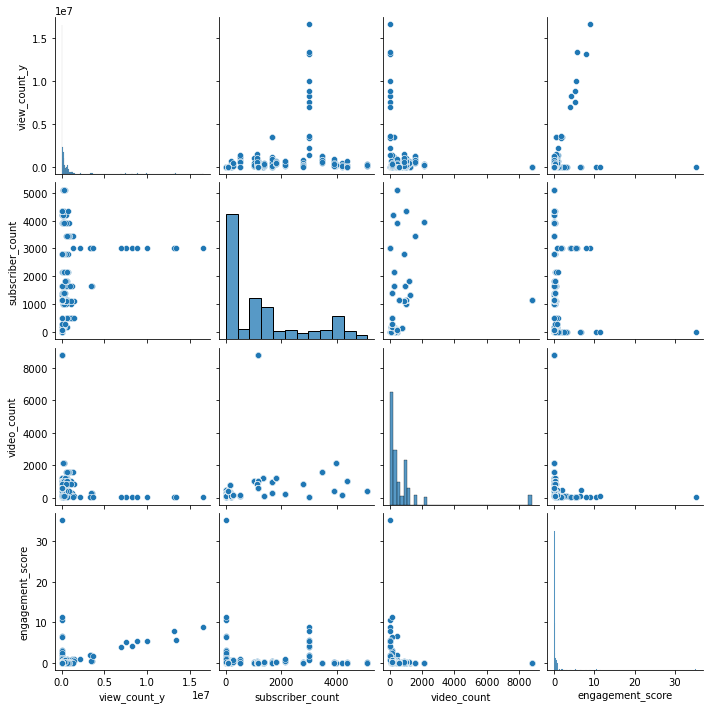

[ 1.00000000e+00 -1.18000636e-14 -3.22630901e-15 -2.02406901e-12]
R-squared score: 1.0


In [44]:
sns.pairplot(df[['view_count_x', 'subscriber_count', 'video_count',  'engagement_score']])
plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['view_count_x', 'subscriber_count', 'video_count', 'engagement_score']], df['view_count_y'], test_size=0.2)

# Train a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Print the coefficients of the model
print(model.coef_)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("R-squared score:", score)

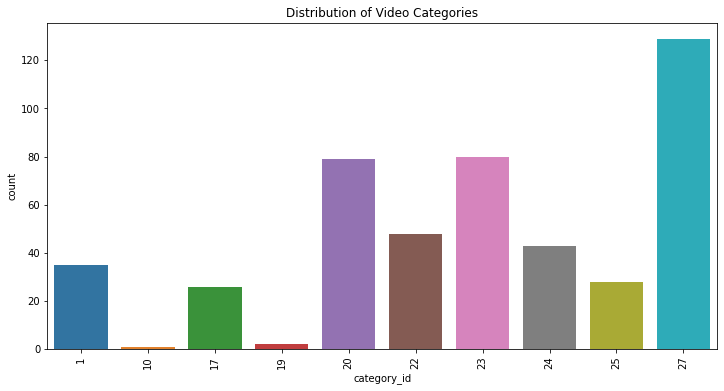

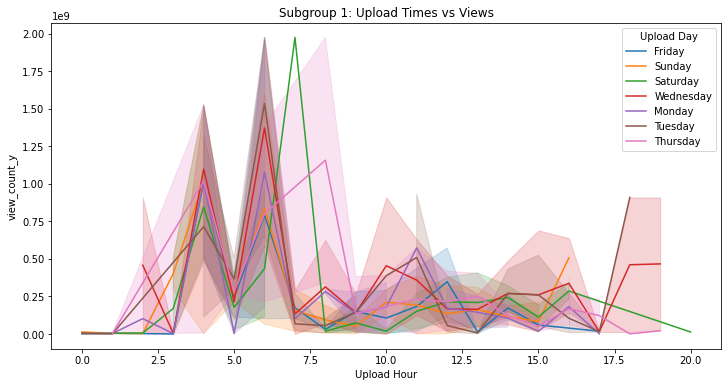

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the video dataset
video_df = pd.read_csv('videos.csv')

# Load the channel dataset
channel_df = pd.read_csv('channels.csv')

# Merge the two datasets based on the Channel Title
merged_df = pd.merge(video_df, channel_df, on='channel_title')

# Create a new column for the day of the week the video was uploaded
merged_df['Upload Day'] = pd.to_datetime(merged_df['upload_time']).dt.day_name()

# Create a new column for the hour of the day the video was uploaded
merged_df['Upload Hour'] = pd.to_datetime(merged_df['upload_time']).dt.hour

# Group the videos by category and upload day to get the total views for each day and category
grouped_df = merged_df.groupby(['category_id', 'Upload Day'])['view_count_y'].sum().reset_index()

# Plot the distribution of video categories
plt.figure(figsize=(12,6))
sns.countplot(x='category_id', data=video_df)
plt.xticks(rotation=90)
plt.title('Distribution of Video Categories')
plt.show()

# Create subgroups of similar categories
subgroup1 = ['1', '2', '10', '15', '17', '19', '20', '22', '23', '24', '25', '26', '27', '28', '29', '30']


# Analyze the demographics of the audience for each subgroup
subgroup1_df = merged_df[merged_df['category_id'].isin(subgroup1)]
subgroup2_df = merged_df[merged_df['category_id'].isin(subgroup2)]
subgroup3_df = merged_df[merged_df['category_id'].isin(subgroup3)]

# Plot the upload times for each subgroup
plt.figure(figsize=(12,6))
sns.lineplot(x='Upload Hour', y='view_count_y', hue='Upload Day', data=subgroup1_df)
plt.title('Subgroup 1: Upload Times vs Views')
plt.show()



# Top 10 Upcoming


In [62]:
import pandas as pd
import datetime as dt
from tabulate import tabulate

# Load the channel dataset
df_channel = pd.read_csv('new_ds.csv')

# Filter channels with less than 6 months of data
filter_date = dt.datetime.now() - pd.DateOffset(months=6)
df_channel = df_channel[pd.to_datetime(df_channel['created_time']).dt.date <= filter_date.date()]

# Calculate the growth rate in terms of percentage increase in engagement score in the last 6 months
df_channel['Growth Rate'] = ((df_channel['engagement_score'] - df_channel['engagement_score'].shift(periods=6, fill_value=0)) / df_channel['engagement_score'].shift(periods=6, fill_value=0)) * 100

# Rank the channels based on the growth rate
df_rank = df_channel.sort_values(by='Growth Rate', ascending=False)

# Select the top 10 upcoming YouTubers
top_10_upcoming = df_rank[df_rank['Growth Rate'].notnull()]['channel_title'].unique()[:10]

df_engage = df_channel.sort_values(by='subscriber_count',ascending = False)
top_10_constant = df_engage[df_engage['subscriber_count'].notnull()]['channel_title'].unique()[:10]

# Display the top 10 upcoming YouTubers and top 10 constant YouTubers in a tabular format
headers = ['Rank', 'Channel Name']
upcoming_table = [[i+1, channel_name] for i, channel_name in enumerate(top_10_upcoming)]
constant_table = [[i+1, channel_name] for i, channel_name in enumerate(top_10_constant)]

print('Top 10 upcoming YouTubers:')
print(tabulate(upcoming_table, headers=headers, tablefmt='fancy_grid', numalign='center', stralign='center', showindex=False))
print('---------------------------------------------------------')
print('top 10 YouTubers:')
print(tabulate(constant_table, headers=headers, tablefmt='fancy_grid', numalign='center', stralign='center', showindex=False))


Top 10 upcoming YouTubers:
╒════════╤═════════════════════════╕
│  Rank  │      Channel Name       │
╞════════╪═════════════════════════╡
│   1    │         Onkiify         │
├────────┼─────────────────────────┤
│   2    │     R.G Bucket List     │
├────────┼─────────────────────────┤
│   3    │ Gold Janardhan Investor │
├────────┼─────────────────────────┤
│   4    │  Comedian Vikas Thakur  │
├────────┼─────────────────────────┤
│   5    │ DilSeBuraLagtaHai Bhai  │
├────────┼─────────────────────────┤
│   6    │    Sudarshan Gurjar     │
├────────┼─────────────────────────┤
│   7    │   SAURABH DAHIVADKAR    │
├────────┼─────────────────────────┤
│   8    │   Finance With Sharan   │
├────────┼─────────────────────────┤
│   9    │      Majnu Gaming       │
├────────┼─────────────────────────┤
│   10   │      Ishaan Arora       │
╘════════╧═════════════════════════╛
---------------------------------------------------------
top 10 YouTubers:
╒════════╤══════════════════════════════╕
│  R

# Most Discussed Words Under Each Category

In [63]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from tabulate import tabulate

# Load the video dataset
df_videos = pd.read_csv('new_ds.csv')

# Create a dictionary of category IDs and names
categories = {
    '1': 'Film and Animation',
    '10': 'Music',
    '17': 'Sports',
    '19': 'Travel and Events',
    '20': 'Gaming',
    '22': 'People and Blogs',
    '23': 'Comedy',
    '24': 'Entertainment',
    '25': 'News and Politics',
    '27': 'Education'
}

# Load the stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Loop through each category ID
for category_id in categories.keys():
    # Filter the dataset by category ID
    df_category = df_videos[df_videos['category_id'] == int(category_id)]
    
    # Concatenate all comments into a single string
    comments = ' '.join(df_category['Comments'].tolist())
    
    # Convert to lowercase and remove punctuation and stop words
    comments = comments.lower()
    comments = comments.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(comments)
    tokens = [word for word in tokens if not word in stop_words]
    
    # Perform frequency analysis on the tokens
    word_counts = Counter(tokens)
    most_common = word_counts.most_common(10)
    
    # Print the most discussed words in the category
    print('\nCategory:', categories[category_id])
    print('Category ID:', category_id)
    
    # Create a list of lists to hold the data
    data = []
    for word, count in most_common:
        data.append([word, count])
    
    # Display the data in a colorful table
    headers = ['Word', 'Count']
    print(tabulate(data, headers=headers, tablefmt='fancy_grid', numalign='center'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Category: Film and Animation
Category ID: 1
╒═══════════╤═════════╕
│ Word      │  Count  │
╞═══════════╪═════════╡
│ video     │   364   │
├───────────┼─────────┤
│ love      │   261   │
├───────────┼─────────┤
│ animation │   230   │
├───────────┼─────────┤
│ like      │   212   │
├───────────┼─────────┤
│ bro       │   207   │
├───────────┼─────────┤
│ anime     │   190   │
├───────────┼─────────┤
│ doraemon  │   172   │
├───────────┼─────────┤
│ videos    │   156   │
├───────────┼─────────┤
│ ️          │   149   │
├───────────┼─────────┤
│ assamese  │   145   │
╘═══════════╧═════════╛

Category: Music
Category ID: 10
╒════════╤═════════╕
│ Word   │  Count  │
╞════════╪═════════╡
│ samay  │   22    │
├────────┼─────────┤
│ song   │   12    │
├────────┼─────────┤
│ parody │    9    │
├────────┼─────────┤
│ great  │    7    │
├────────┼─────────┤
│ one    │    7    │
├────────┼─────────┤
│ needed │    7    │
├────────┼─────────┤
│ rap    │    7    │
├────────┼─────────┤
│ never  │  

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge,Lasso

# Load the dataset from a CSV file


# df.drop('video_count', axis=1, inplace=True)
# df.drop('created_time', axis=1, inplace=True)
# df.drop('tags', axis=1, inplace=True)

# Add the 'Traffic' column to the dataframe
df["Traffic"] = (df["view_count_x"] + df["subscriber_count"] + (df["engagement_score"]*10))/3

# Define the independent and dependent variables
X = df[['view_count_x', 'subscriber_count', 'engagement_score', 'duration_re', 'Sen_Com','likes', 'comments']]
y = df['Traffic']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Ridge regression model with alpha=0.5 to avoid over-fitting
model = Lasso(alpha=0.5)
model.fit(X_train, y_train)


# # Train a linear regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.9999999793098819


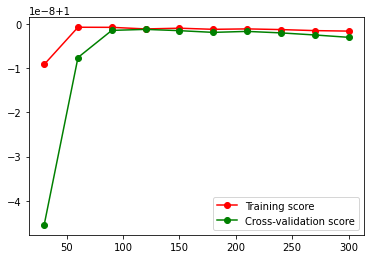

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

plt.show()